# Gráficos com seaborn

## Links para dados de seguro de automóveis da SUSEP

* Autoseg: https://www2.susep.gov.br/menuestatistica/Autoseg/principal.aspx

Sobre os dados completos:
* [Manual da SUSEP](https://www.gov.br/susep/pt-br/servicos/mercado/enviar-dados/arquivos/manual_de_orientacao_para_envio_de_dados_out2023.pdf) (p.81-. Sinistros: p.87-)

* Link para baixar os dados completos: ['AUTO_2021A.rar'](https://www2.susep.gov.br/download/basesdados/scd_auto/AUTO_2021A.rar) (usei o 'S_AUTO_2021A.csv')

Importar pacotes necessários:

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os

# gráficos - seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

## Leitura dos microdados

Os dados serão lidos a partir do *google drive*.

In [2]:
# alterar o caminho se necessário, especificando a pasta
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dados/AUTO_2021A')
# ler o arquivo csv
# o conjunto de dados está com o separador ; e os decimais com ,
df = pd.read_csv('S_AUTO_2021A.csv', sep=';', decimal=',')

Mounted at /content/drive


<ipython-input-2-a06ec60eebe7>:6: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('S_AUTO_2021A.csv', sep=';', decimal=',')


## Visão geral dos dados


In [3]:
# para visualizar até o número desejado de colunas
pd.set_option('display.max_columns', 24)

In [4]:
# mostrar as 5 primeiras linhas
df.head()

,cod_apo,ENDOSSO,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,COD_MODELO,ANO_MODELO,COD_TARIF,REGIAO,COD_CONT,EVENTO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP
0,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,1,8,63.00,0.00,0,0.00,0,20201016,20201026,20201015,7,M,19740216,9371420
1,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,1,8,63.00,0.00,0,0.00,0,20201017,20201026,20201016,7,M,19740216,9371420
2,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,1,8,80.00,0.00,0,0.00,0,20201017,20201105,20201016,7,M,19740216,9030620
3,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,1,8,100.00,0.00,0,0.00,0,20200812,20200819,20200811,7,M,19740216,9371520
4,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,1,8,127.00,0.00,0,0.00,0,20200812,20200819,20200811,7,M,19740216,0


In [5]:
# número de linhas (observações) e colunas (variáveis)
df.shape

(3747647, 24)

Há informações sobre 3.747.647 observações (sinistros) e são 24 variáveis.

## Ajustes já vistos

In [6]:
# cópia do dataframe
dados = df.copy()
# apagar variáveis
dados = dados.drop(['cod_apo', 'ENDOSSO'], axis=1)
# apagar linha faltante
dados.dropna(inplace=True)

In [7]:
# limpeza da variável 'REGIAO'
# converter todas as ocorrências para número e considerar as não númericas como NaN
dados['REGIAO'] = pd.to_numeric(dados['REGIAO'], errors='coerce')
# transformar NaN em 0
dados['REGIAO'].fillna(0, inplace=True)
# retirar linhas com 'REGIAO' igual a 0 e com 'CEP' igual a 0
dados = dados.drop(dados[(dados['REGIAO'] == 0) & (dados['CEP'] == 0)].index)

<ipython-input-7-90fbab4f458b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['REGIAO'].fillna(0, inplace=True)


In [8]:
# nova coluna 'DATA' pela transformação da data de nascimento no formato correto
dados['DATA'] = pd.to_datetime(dados['D_NASC'], format='%Y%m%d', errors='coerce')
# criar nova coluna 'IDADE' calculada a partir de 'DATA'
now = pd.to_datetime('now', utc=True)
dados['IDADE'] = (now.year - dados['DATA'].dt.year) - ((now.month - dados['DATA'].dt.month) < 0)
# substituir os NaN de IDADE por 'Não informada'
dados['IDADE'] = dados['IDADE'].fillna('Não informada')

In [9]:
dados.shape

(3747009, 24)

In [10]:
# dados.sample(10)

# Uso de dicionários para substituir códigos por categorias

* Para que possamos substituir os códigos de algumas variáveis pelas suas ocorrências, vamos criar dicionários.

* O dicionário é um tipo de dado em que temos o par 'chave: valor', sendo que a chave tem que ser única para aquele dicionário.

* Para realizar as substituições que vou mostrar, é preciso baixar os dados referentes ao segundo semestre de 2020 e lá estarão algumas planilhas importantes.

In [11]:
# variável 'MODALIDADE'
# criação do dicionário
mod_d = {1: 'VMR',
         2: 'VR',
         3: 'RCF',
         4: 'SP'}
# substituir os códigos pelas descrições usando replace()
dados['MODALIDADE']= dados['MODALIDADE'].replace(mod_d)

In [12]:
# variável 'TIPO_PROD'
# criação do dicionário
prod_d = {1: 'Padrão',
          2: 'Perfil'}
# substituir os códigos pelas descrições usando replace()
dados['TIPO_PROD']= dados['TIPO_PROD'].replace(prod_d)

In [13]:
# variável 'COBERTURA'
cob_d = {1: 'Compreensiva',
         2: 'Incêndio e roubo',
         3: 'Incêndio',
         4: 'Indenização integral, colisão e roubo',
         5: 'Colisão e incêndio',
         9: 'Outros'}
# substituir os códigos pelas descrições usando replace()
dados['COBERTURA']= dados['COBERTURA'].replace(cob_d)

In [14]:
# variável 'COD_MODELO'
# alterar o nome da variável para MODELO
dados.rename(columns={'COD_MODELO': 'MODELO'}, inplace=True)
# carregar a planilha com as codificações dos modelos de automóveis
vei = pd.read_csv('/content/drive/My Drive/dados/Autoseg2021A/auto2_vei.csv', sep=';', encoding='latin1')
# criar o dicionário usando a coluna 'CODIGO' como chave
# e a coluna 'GRUPO' para fazer a substituição
# poderia ser 'DESCRICAO'
vei_d = vei.set_index('CODIGO')['GRUPO'].to_dict()
# substituir os códigos pelas descrições usando map()
# já criando a nova variável
dados['MODELO']= dados['MODELO'].map(vei_d)
# vamos substituir os NaN por 'Outros'
dados['MODELO'] = dados['MODELO'].fillna('OUTROS')

In [15]:
# variável 'REGIAO'
# eu especifiquei as subpastas onde os arquivos se encontram
# dentro do meu google drive: /dados/Autoseg2021A/
reg = pd.read_csv('/content/drive/My Drive/dados/Autoseg2021A/auto_reg.csv', sep=';', encoding='latin1')
# criar o dicionário usando a coluna 'CODIGO' como chave
# e a coluna 'DESCRICAO' para fazer a substituição
reg_d = reg.set_index('CODIGO')['DESCRICAO'].to_dict()
# substituir os códigos pelas descrições
dados['REGIAO'].replace(reg_d, inplace=True)

<ipython-input-15-f29f1347e695>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['REGIAO'].replace(reg_d, inplace=True)


In [16]:
# variável 'COD_TARIF' (do veículo)
# tirar alguns dos espaços que aparecem antes de alguns códigos
dados['COD_TARIF'] = dados['COD_TARIF'].str.split().str.join(' ')
# retirar o 0 do início de alguns números
dados['COD_TARIF'] = dados['COD_TARIF'].str.replace(r'^0+(\d*)$', r'\1', regex=True)
# substituir os vazios gerados por 0
dados['COD_TARIF'] = dados['COD_TARIF'].replace('', '0')
# criar dicionário
tarif_d = {'10': 'Passeio Nacional',
          '11': 'Passeio Importado',
          '14A': 'Pick-ups leves Nacionais – exceto Kombi e Saveiro',
          '14B':  'Pick-ups leves Nacionais – somente Kombi',
          '14C':  'Pick-ups leves Nacionais – somente Saveiro',
          '15': 'Pick-ups leves Importados',
          '16': 'Modelos esportivos Nacionais',
          '17': 'Modelos esportivos Importados',
          '18': 'Modelos Especiais (Passeio) Nacionais',
          '19': 'Modelos Especiais (Passeio) Importados',
          '20': 'Pick-ups pesadas Carga Nacionais',
          '21': 'Pick-ups pesadas Carga Importados',
          '22': 'Pick-ups pesadas Pessoas Nacionais',
          '23': 'Pick-ups pesadas Pessoas Importado',
          '30': 'Bicicletas Motorizadas, Motocicletas, Motonetas com Reboque ou SIDE-CAR, VESPACAR Nacionais',
          '31': 'Bicicletas Motorizadas, Motocicletas, Motonetas com Reboque ou SIDE-CAR, VESPACAR Importados',
          '40': 'Caminhões Leves Nacionais (até 6,9 ton)',
          '41': 'Caminhões Leves Importados (até 6,9 ton)',
          '42': 'Caminhões Pesados Nacionais (acima de 7 ton – inclusive)',
          '43': 'Caminhões Pesados Importados (acima de 7 ton – inclusive)',
          '50': 'Rebocadores Nacionais',
          '51': 'Rebocadores Importados',
          '52': 'Reboques e Semi-Reboques Nacionais',
          '53': 'Reboques e Semi-Reboques Importados',
          '58': 'Ônibus e Microônibus com Cobrança de Frete Nacionais (exceto urbano com linha regular)',
          '59': 'Ônibus e Microônibus com Cobrança de Frete Importados (exceto urbano com linha regular)',
          '60': 'Ônibus e Microônibus com Cobrança de Frete Nacionais ( urbano com linha regular)',
          '61': 'Ônibus e Microônibus com Cobrança de Frete Importados (urbano com linha regular)',
          '62': 'Ônibus e Microônibus sem Cobrança de Frete Nacionais',
          '63': 'Ônibus e Microônibus sem Cobrança de Frete Importados',
          '68': 'Tratores e Máquinas de Uso Urbano Nacionais',
          '69': 'Tratores e Máquinas de Uso Urbano Importados',
          '70': 'Tratores e Máquinas de Uso Rural Nacionais',
          '71': 'Tratores e Máquinas de Uso Rural Importados',
          '72': 'Guinchos Nacionais (carro socorro)',
          '73': 'Guinchos Importados (carro socorro)',
          '80': 'Táxi Nacionais',
          '81': 'Táxi Importados',
          '82': 'Lotação, Transporte Solidário Nacionais',
          '83': 'Lotação, Transporte Solidário Importados',
          '84': 'Veículo Escolar Nacional (transporte escolar)',
          '85': 'Veículo Escolar Importado (transporte escolar)',
          '86': 'Viagem de Entrega dentro do Território Nacional – Nacional',
          '87': 'Viagem de Entrega dentro do Território Nacional – Importado',
          '88': 'Viagem de Entrega Exclusivamente para Países da América do Sul – Nacional',
          '89': 'Viagem de Entrega Exclusivamente para Países da América do Sul – Importado',
          '90': 'Locadoras Nacionais',
          '91': 'Locadoras Importados',
          '92': 'Veículos Funerários Nacionais',
          '93': 'Veículos Funerários Importados',
          '94': 'Ambulância',
          '95': 'Auto-Escolas',
          '96': 'Bombeiros',
          '97': 'Policiamento'}
# alterar o nome da variável para CATEGORIA
dados.rename(columns={'COD_TARIF': 'CATEGORIA'}, inplace=True)
# usar a função map() para efetuar as substituições
dados['CATEGORIA'] = dados['CATEGORIA'].map(tarif_d)
# substiutir NaNs gerados pela função map() por 'Outros'
dados['CATEGORIA'] = dados['CATEGORIA'].fillna('Outros')

In [17]:
# variável 'COD_CONT'
# alterar o nome da variável para CONTRATO
dados.rename(columns={'COD_CONT': 'CONTRATO'}, inplace=True)
# criação do dicionário
cont_d = {1: 'VMR',
         2: 'VD'}
# substituir os códigos pelas descrições usando replace()
dados['CONTRATO']= dados['CONTRATO'].replace(cont_d)

In [18]:
# variável 'EVENTO'
# criação do dicionário
eve_d = {0: 'Não informado',
         1: 'Casco',
         2: 'Responsabilidade Civil Facultativa de Veículos - Danos Materiais',
         3: 'Responsabilidade Civil Facultativa de Veículos - Danos Corporais',
         4: 'Responsabilidade Civil Facultativa de Veículos - Danos Morais',
         5: 'Acidentes Pessoais Passageiros - Morte Acidental',
         6: 'Acidentes Pessoais Passageiros - Invalidez Permanente por Acidente',
         7: 'Acidentes Pessoais Passageiros - Despesas Médico Hospitalares',
         8: 'Outros'}
# substituir os códigos pelas descrições usando replace()
dados['EVENTO']= dados['EVENTO'].replace(eve_d)

In [19]:
dados['CAUSA'].value_counts()

,count
CAUSA,
9,1403913
7,1260535
4,737261
2,264680
5,57883
3,16735
1,3888
6,2113
8,1


In [20]:
# variável 'CAUSA' (geradora do sinistro)
# criação do dicionário
causa_d = {1: 'Roubo/Furto',
           2: 'Roubo',
           3: 'Furto',
           4: 'Colisão parcial',
           5: 'Colisão Indenização Integral',
           6: 'Incêndio',
           7: 'Assistência 24 horas',
           8: 'Outros',    # código 8 não está descrito no manual (só há uma ocorrência)
           9: 'Outros'}
# substituir os códigos pelas descrições usando replace()
dados['CAUSA']= dados['CAUSA'].replace(causa_d)

In [21]:
dados.describe()

,ITEM,ANO_MODELO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,D_NASC,CEP,DATA
count,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3747009.00,3190097
mean,66.81,2012.31,3157.03,253.80,286961.45,5.69,24208.99,20201251.68,15094900.68,20200967.71,16782152.69,33698486.56,1971-07-04 01:40:03.154888416
min,0.00,0.00,-176275.00,-414000.00,0.00,-75980.00,0.00,0.00,0.00,19970330.00,0.00,0.00,1682-03-20 00:00:00
25%,0.00,2012.00,98.00,0.00,0.00,0.00,0.00,20200819.00,0.00,20200814.00,19530225.00,6142250.00,1961-03-27 00:00:00
50%,0.00,2014.00,243.00,0.00,0.00,0.00,0.00,20201007.00,20201002.00,20201001.00,19681220.00,18550000.00,1973-01-04 00:00:00
75%,1.00,2018.00,1223.00,0.00,0.00,0.00,0.00,20201123.00,20201210.00,20201117.00,19810311.00,60822000.00,1982-09-15 00:00:00
max,180494.00,2022.00,1457500.00,454777.00,20220301.00,215484.00,20220303.00,20210228.00,20220317.00,20210227.00,29950928.00,99999999.00,2088-01-22 00:00:00
std,1456.08,59.01,12254.73,3678.23,2390708.82,545.32,699010.89,29567.55,8781144.29,1158.44,7011309.69,32311339.35,NaN


In [22]:
dados.sample(5)

,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,MODELO,ANO_MODELO,CATEGORIA,REGIAO,CONTRATO,EVENTO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP,DATA,IDADE
695147,1,VMR,Perfil,Compreensiva,TOYOTA COROLLA,2017,Passeio Nacional,MG - Met.BH-Centro Oeste-Zona Mata-C. Vertentes,VMR,Casco,1091.00,0.00,0,0.00,0,20201023,0,20201022,Outros,M,19380529,30662390,1938-05-29,87.00
1292212,0,VMR,Padrão,Compreensiva,HYUNDAI CRETA,2018,Pick-ups pesadas Pessoas Nacionais,SP - Met. de São Paulo,VMR,Outros,80.00,0.00,0,0.00,0,20200802,20200821,20200801,Assistência 24 horas,F,19821025,2060000,1982-10-25,42.00
1430282,1,VMR,Perfil,Compreensiva,HYUNDAI CRETA,2018,Passeio Nacional,SP - Ribeirão Preto e Demais Mun. de Campinas,VMR,Responsabilidade Civil Facultativa de Veículos...,4180.00,0.00,0,0.00,0,20200813,20200909,20200813,Outros,F,19521231,14403510,1952-12-31,72.00
1816629,27,RCF,Padrão,Outros,SCANIA CAMINHOES - OUTROS,2008,Passeio Nacional,SP - Met. de São Paulo,VMR,Casco,5509.00,0.00,0,0.00,0,20200722,20200722,20200721,Colisão parcial,M,19790505,2063000,1979-05-05,46.00
2098091,1,VMR,Perfil,Compreensiva,FIAT PALIO 1.0,2013,Passeio Nacional,BA - Bahia,VMR,Casco,994.00,0.00,0,0.00,0,20200623,20200707,20200520,Outros,F,19710311,41320000,1971-03-11,54.00


In [23]:
dados.columns

Index(['ITEM', 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO', 'ANO_MODELO',
       'CATEGORIA', 'REGIAO', 'CONTRATO', 'EVENTO', 'INDENIZ', 'VAL_SALVAD',
       'D_SALVADO', 'VAL_RESS', 'D_RESS', 'D_AVI', 'D_LIQ', 'D_OCORR', 'CAUSA',
       'SEXO', 'D_NASC', 'CEP', 'DATA', 'IDADE'],
      dtype='object')

Variáveis:

* Quantitativas: 'ANO_MODELO', 'INDENIZ', 'VAL_SALVAD', 'IDADE'
* Qualitativas: 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO', 'CATEGORIA', 'REGIAO', 'CONTRATO', 'EVENTO', 'CAUSA', 'SEXO'

# Gráficos com seaborn

https://seaborn.pydata.org/tutorial/introduction.html

In [24]:
# aplicar tema padrão
sns.set_theme()
# estilo: darkgrid, whitegrid, dark, white ou ticks
sns.set_style('white')

Ficaram ainda alguns problemas com os valores que teremos que lidar para gerar os gráficos. Para isso, vamos fazer uma cópia do dataframe 'dados' e realizar algumas modificações que vão nos auxiliar. Alguns problemas:

* Valores de indenizacão negativos;
* Algumas ocorrências de idade faltantes (que substituímos por 'Não informada');
* Ano do modelo do veículo iguais a 0;
* Sexo igual a 0 (sem informação);
* Valor salvado negativo (os que forem iguais a 0 vamos manter, pois há sinistros sem valor salvado).

Valor salvado: valor de um automóvel cujo sinistro foi regularizado como perda total e ainda tenha algum valor de mercado (seja para reparação ou para fornecimento de peças).

In [25]:
df1 = dados.copy()
# variável 'IDADE'
df1['IDADE'] = df1['IDADE'].replace({'Não informada': 0})
# idade entre 18 e 100, ano do veículo > 0,
# indenização > 0, sexo diferente de 0,
# valor salvado >= 0
df1 = df1.query('IDADE > 18 & IDADE < 100 & ANO_MODELO > 0 & INDENIZ >= 0 & SEXO != "0" & VAL_SALVAD >= 0')

<ipython-input-25-c8231df44403>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['IDADE'] = df1['IDADE'].replace({'Não informada': 0})


In [26]:
df1.shape

(3171398, 24)

## Variáveis numéricas

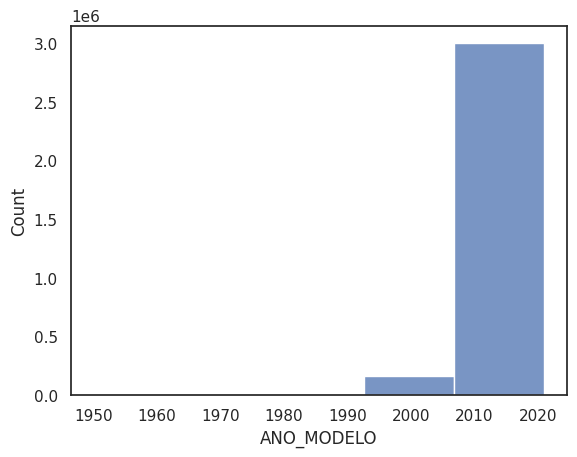

In [27]:
# histograma
sns.histplot(data=df1, x='ANO_MODELO', bins=5);

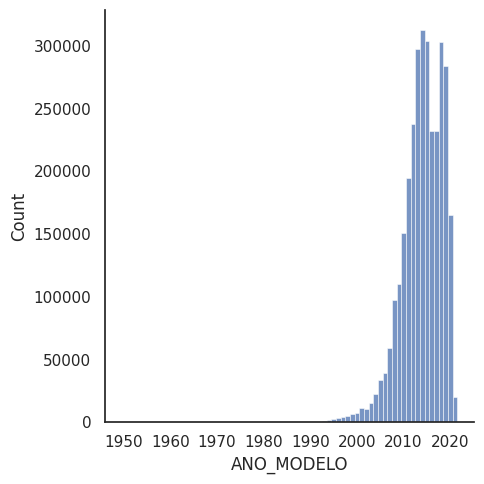

In [28]:
# histograma
sns.displot(df1, x='ANO_MODELO', discrete=True);

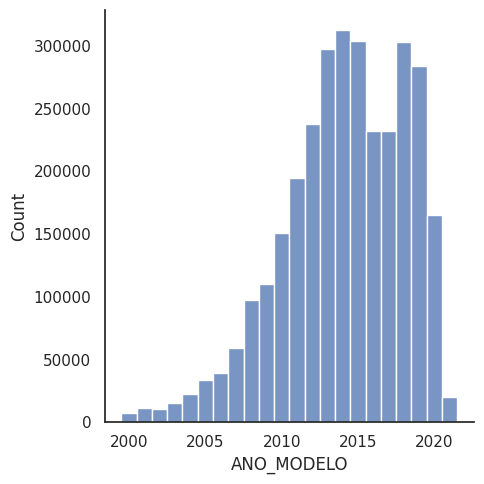

In [29]:
# selecionar apenas os modelos acima de 2000
df1 = df1[df1['ANO_MODELO'] >= 2000]
# histograma
sns.displot(df1, x='ANO_MODELO', discrete=True);

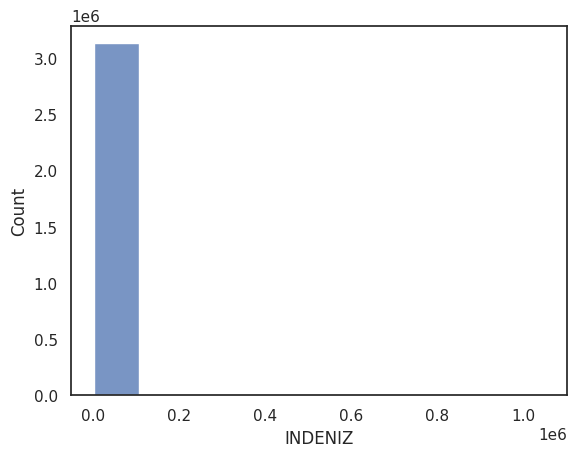

In [30]:
# histograma
sns.histplot(data=df1, x='INDENIZ', bins=10);

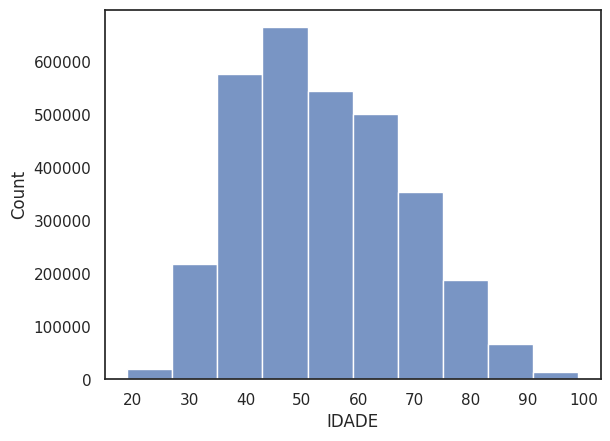

In [31]:
# histograma
sns.histplot(data=df1, x='IDADE', bins=10);

## Variáveis categóricas

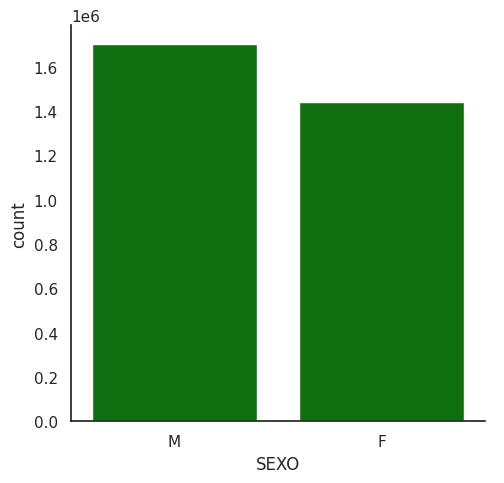

In [32]:
# gráfico de colunas
sns.catplot(data=df1, x='SEXO', kind='count', color='green');

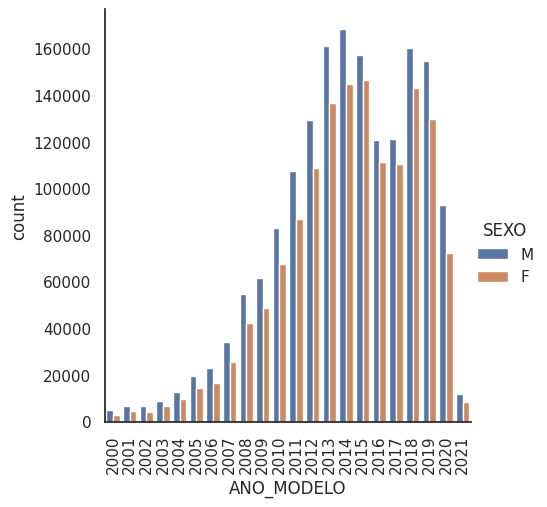

In [33]:
# gráfico de colunas
g = sns.catplot(data=df1, x='ANO_MODELO', hue='SEXO', kind='count');
g.tick_params(axis='x', rotation=90);

Paletas: https://seaborn.pydata.org/tutorial/color_palettes.html

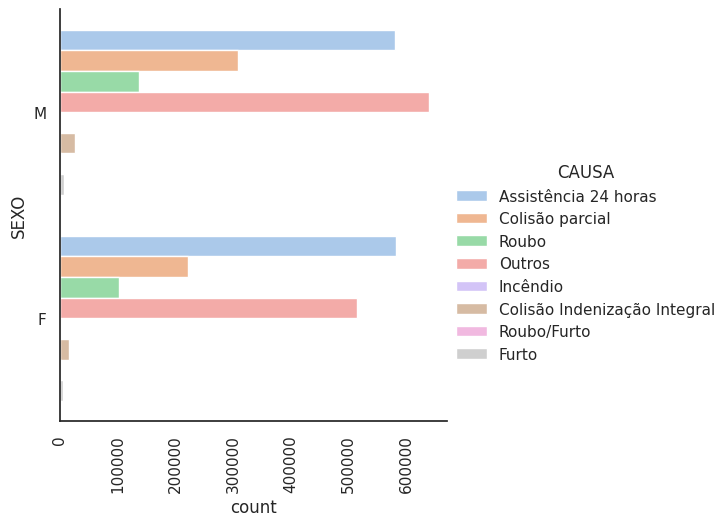

In [34]:
# gráfico de barras
g = sns.catplot(data=df1, y='SEXO', hue='CAUSA', kind='count', palette='pastel');
g.tick_params(axis='x', rotation=90);

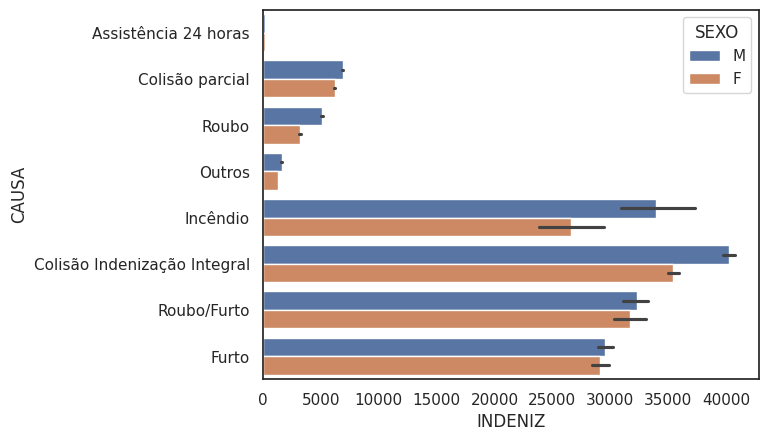

In [35]:
# gráfico de barras
sns.barplot(data=df1, x='INDENIZ', y='CAUSA', hue='SEXO');

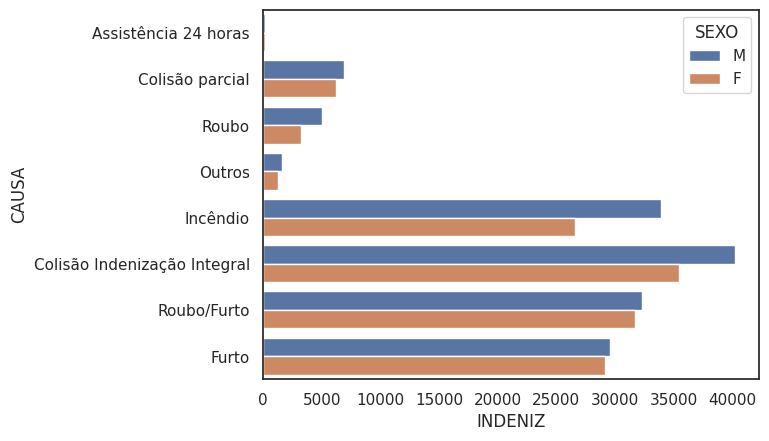

In [36]:
# gráfico de barras
sns.barplot(data=df1, x='INDENIZ', y='CAUSA', hue='SEXO', errorbar=None);

Qual o número de ocorrências de cada causa de sinistro dividindo por sexo?

In [37]:
df1.groupby(['CAUSA', 'SEXO']).size().unstack(fill_value=0)

SEXO,F,M
CAUSA,,
Assistência 24 horas,581549,580514
Colisão Indenização Integral,15489,25807
Colisão parcial,221682,308423
Furto,4643,7715
Incêndio,428,912
Outros,515053,639115
Roubo,101738,137150
Roubo/Furto,1449,2112


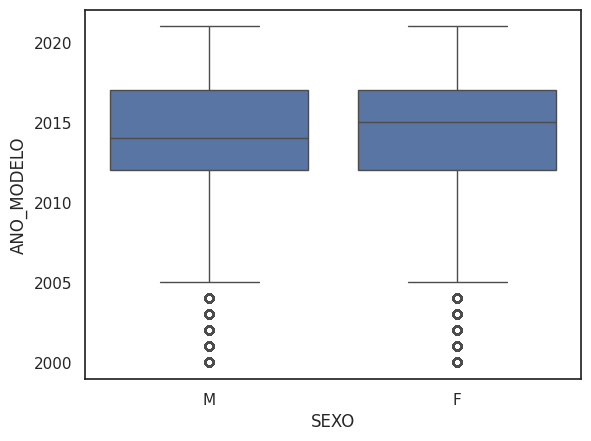

In [38]:
# boxplots
sns.boxplot(data=df1, x='SEXO', y='ANO_MODELO');

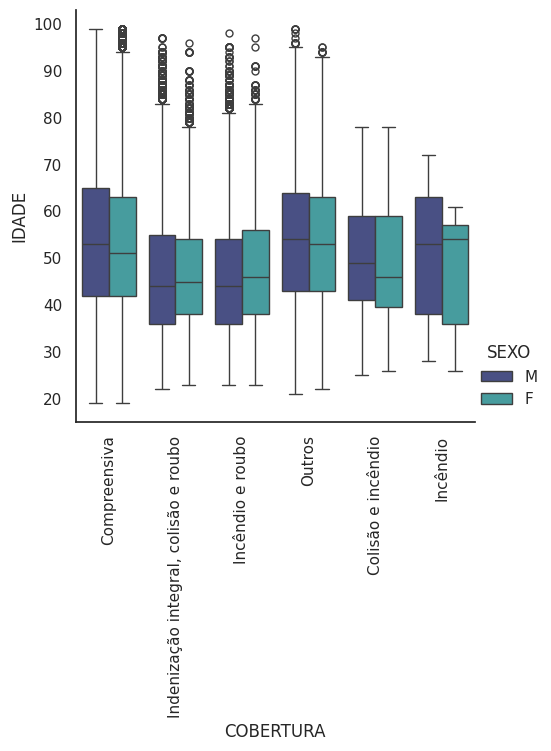

In [39]:
# boxplots
a = sns.catplot(data=df1, x='COBERTURA', y='IDADE', hue='SEXO', kind='box', palette='mako')
a.tick_params(axis='x', rotation=90);

## Correlações entre variáveis

In [40]:
df1.corr(numeric_only=True)

,ITEM,ANO_MODELO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,D_NASC,CEP,IDADE
ITEM,1.00,0.01,0.01,0.00,0.00,-0.00,0.00,0.00,0.01,-0.00,0.01,-0.00,-0.01
ANO_MODELO,0.01,1.00,0.07,0.01,-0.02,0.00,0.01,0.00,0.09,0.03,0.06,0.09,-0.06
INDENIZ,0.01,0.07,1.00,0.36,0.22,0.07,0.03,0.00,-0.04,0.02,0.04,0.05,-0.04
VAL_SALVAD,0.00,0.01,0.36,1.00,0.58,0.07,0.03,-0.00,0.01,-0.00,0.01,0.01,-0.01
D_SALVADO,0.00,-0.02,0.22,0.58,1.00,0.04,0.04,-0.00,0.00,-0.00,0.02,-0.01,-0.02
VAL_RESS,-0.00,0.00,0.07,0.07,0.04,1.00,0.20,-0.00,-0.01,-0.00,0.00,-0.00,-0.00
D_RESS,0.00,0.01,0.03,0.03,0.04,0.20,1.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
D_AVI,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.03,0.00,-0.00,-0.00
D_LIQ,0.01,0.09,-0.04,0.01,0.00,-0.01,0.00,-0.00,1.00,-0.08,-0.15,0.03,0.15
D_OCORR,-0.00,0.03,0.02,-0.00,-0.00,-0.00,-0.00,0.03,-0.08,1.00,0.01,-0.06,-0.01


In [41]:
df1.columns

Index(['ITEM', 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO', 'ANO_MODELO',
       'CATEGORIA', 'REGIAO', 'CONTRATO', 'EVENTO', 'INDENIZ', 'VAL_SALVAD',
       'D_SALVADO', 'VAL_RESS', 'D_RESS', 'D_AVI', 'D_LIQ', 'D_OCORR', 'CAUSA',
       'SEXO', 'D_NASC', 'CEP', 'DATA', 'IDADE'],
      dtype='object')

In [42]:
df1.loc[:, ['ANO_MODELO', 'INDENIZ', 'VAL_SALVAD', 'VAL_RESS', 'IDADE']].corr()

,ANO_MODELO,INDENIZ,VAL_SALVAD,VAL_RESS,IDADE
ANO_MODELO,1.00,0.07,0.01,0.00,-0.06
INDENIZ,0.07,1.00,0.36,0.07,-0.04
VAL_SALVAD,0.01,0.36,1.00,0.07,-0.01
VAL_RESS,0.00,0.07,0.07,1.00,-0.00
IDADE,-0.06,-0.04,-0.01,-0.00,1.00


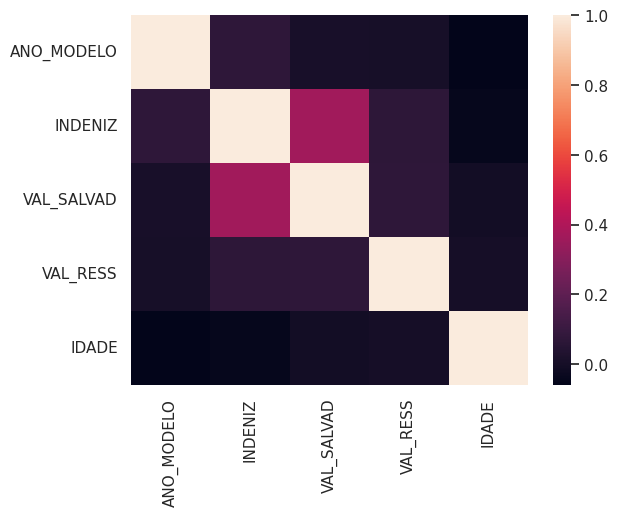

In [43]:
# mapa de calor - heatmap
sns.heatmap(df1.loc[:, ['ANO_MODELO', 'INDENIZ', 'VAL_SALVAD', 'VAL_RESS', 'IDADE']].corr());

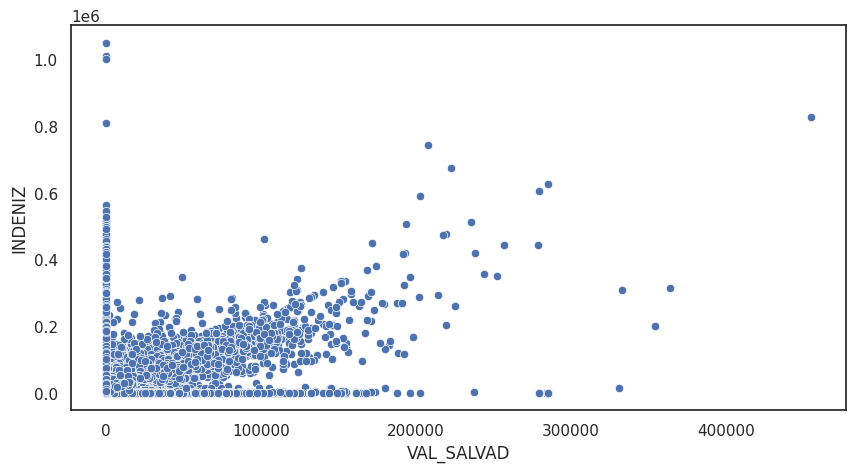

In [44]:
# diagrama de dispersão
plt.figure(figsize=(10,5))    # alterar o tamanho da figura
sns.scatterplot(data=df1, x='VAL_SALVAD', y='INDENIZ');

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


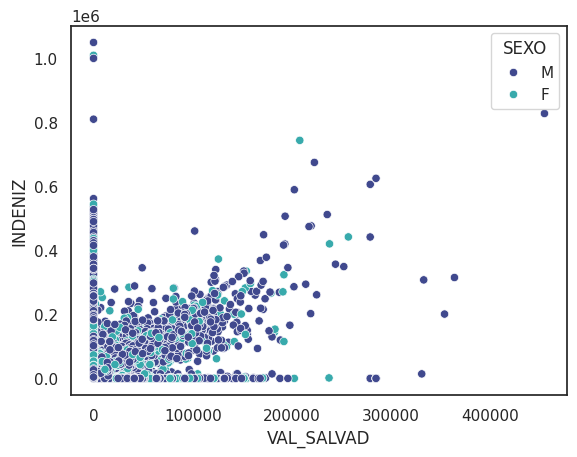

In [45]:
# diagrama de dispersão
sns.scatterplot(data=df1, x='VAL_SALVAD', y='INDENIZ', hue='SEXO', palette='mako');

Relações entre variáveis

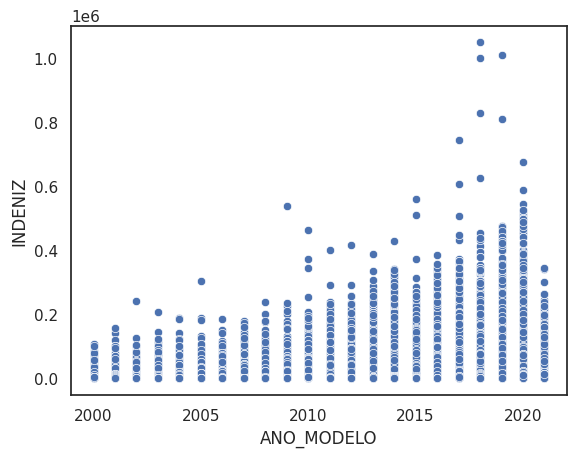

In [46]:
# diagrama de dispersão
sns.scatterplot(data=df1, x='ANO_MODELO', y='INDENIZ');

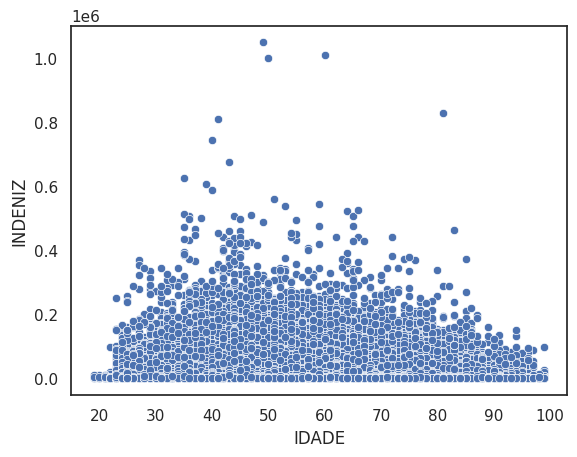

In [47]:
# diagrama de dispersão
sns.scatterplot(data=df1, x='IDADE', y='INDENIZ');

Se quisermos saber qual foi o mês em que mais ocorreram sinistros?

In [48]:
# nova coluna 'AVISO' pela transformação da data de aviso de sinistro
df1['D_AVI'] = pd.to_datetime(df1['D_AVI'], format='%Y%m%d', errors='coerce')
# criar nova coluna 'MES_AVI' calculada a partir de 'D_AVI'
df1['MES_AVI'] = df1['D_AVI'].dt.month
# criar nova coluna 'ANO_AVI' calculada a partir de 'D_AVI'
df1['ANO_AVI'] = df1['D_AVI'].dt.year
# transformar os meses e anos em inteiros
df1['MES_AVI'] = df1['MES_AVI'].astype('Int64')
df1['ANO_AVI'] = df1['ANO_AVI'].astype('Int64')
# apagar dados faltantes
df1.dropna(inplace=True)

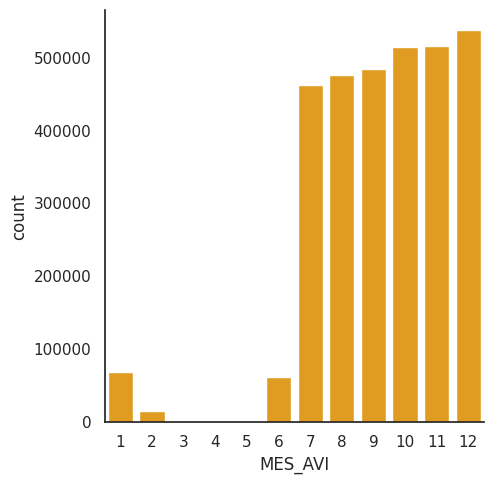

In [49]:
# gráfico de colunas
sns.catplot(data=df1, x='MES_AVI', kind='count', color='orange');